In [1]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
from bs4 import BeautifulSoup
import requests
import re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#This first URL is to obtain the total of pages we will iterate through
#'https://www.trustpilot.com/review/www.axa.co.uk and https://www.trustpilot.com/review/www.axa.co.uk?page=1 work exactly the same '
url= 'https://www.trustpilot.com/review/www.axa.co.uk?page=1'
results=requests.get(url)
doc=BeautifulSoup(results.text, 'html.parser')

#Obtains the total of pages
pages=doc.find('a', {'name':'pagination-button-last'})
total_pages=int(pages.string)



## Obtaining reviews paragraphs

In [5]:
#Only the paragraphs belonging to the correct class reviews
#paragraphs2=doc.find_all('p',{'class':"typography_typography__QgicV typography_body__9UBeQ typography_color-black__5LYEn typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3"})


In [6]:
#text for obtaining the text even if it has breaks <br>
#if I use .string instead of .text returns None when <br> present
# for para in paragraphs2:
#   print(para.text)

## Obtaining the date of the reviews

In [7]:
# dates=doc.find_all('time')
# len(dates)

## Obtaining data by descendants

In [8]:
# section=doc.find('section',{'class':"styles_reviewsContainer__3_GQw"})

## Should iterate through these articles
# articles=doc.find_all('article',{'class':"paper_paper__1PY90 paper_square__lJX8a card_card__lQWDv styles_reviewCard__hcAvl"})
# articles=doc.find_all('article',{'class':"paper_paper__1PY90 paper_square__lJX8a card_card__lQWDv styles_reviewCard__hcAvl styles_raised__HxiOi"})

#wrapers are the base, they are the containers of the reviews



In [9]:
## Obtaining date
# times=wrapers[0].contents[0].contents[1].find('time')
# t=times['datetime']
# fecha=re.search("([0-9]{4}\-[0-9]{2}\-[0-9]{2})", t)
# fecha[0]
# print (datetime.fromisoformat(fecha[0]).date())

In [10]:
# for w in wrapers[3].contents[1]:
#   print(w)


In [11]:
# wrapers[3].contents[1].find('p').text

In [93]:
# for page in range(total_pages):
lista=[]
for page in range(1,total_pages+1):

  #print(f'this is page{page}')


  url= f'https://www.trustpilot.com/review/www.axa.co.uk?page={page}'
  results=requests.get(url)
  doc=BeautifulSoup(results.text, 'html.parser')

#wrapers are the base of everything there is on content wrapper of class "styles_reviewContentwrapper__zH_9M
#for every review and they nest rating, time, title and the review text
  wrapers=doc.find_all('section',{'class':"styles_reviewContentwrapper__zH_9M"})
  
  
  for i in range(len(wrapers)):
    #this gets the rating wrapers[i].contents[0]['data-service-review-rating']
    rating=int(wrapers[i].contents[0]['data-service-review-rating'])
    #this gets the date
    times_tag=wrapers[i].contents[0].contents[1].find('time')
    time_string_long=times_tag['datetime']
    time_string_regex=re.search("([0-9]{4}\-[0-9]{2}\-[0-9]{2})", time_string_long)
    time_string_short=time_string_regex[0]
    date= datetime.fromisoformat(time_string_short).date()
    #Review title
    title=wrapers[i].contents[1].find('h2').text
    #Review tex
    if wrapers[i].contents[1].find('p'):
      review=wrapers[i].contents[1].find('p').text
    else:
      review= None


    data=[rating,date,title,review]

    lista.append(data) 
  


In [94]:
# df=pd.DataFrame(lista,columns=[['Rating', 'Date', 'Title', 'Review']])
df=pd.DataFrame(lista)

In [131]:
# type(df.Date.loc[0][0])

In [132]:
df.head()

,0,1,2,3
0,5,2022-07-24,Website was easy to get around it…,Website was easy to get around it didn't take ...
1,5,2022-07-23,Very helpful gentleman helped me sort…,Very helpful gentleman helped me sort out addi...
2,5,2022-07-23,Changed my car and wanted to update my insurance,Changed my car and wanted to update my insuran...
3,1,2022-07-23,Useless emergency policy,Bought emergency cover for plumbing and drains...
4,3,2022-07-23,Delay in receiving new car insurance documents,Although I received my new insurance certifica...


In [134]:
df[1] = pd.to_datetime(df[1]) - pd.to_timedelta(7, unit='d')

In [136]:
# This is for grouping by week (can be adjusted to month)
# df.groupby([pd.Grouper(key=1, freq='W')])[0].mean()

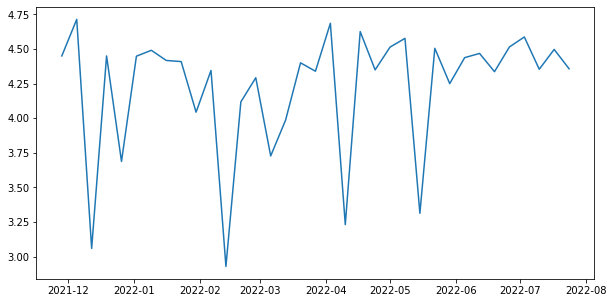

In [130]:
plt.figure(figsize=(10, 5))
plt.plot(df.groupby([pd.Grouper(key=1, freq='W')])[0].mean())
plt.show()